In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.interpolate as spi

In [5]:
D = 3
N = 1e8
true_nlist = [1.5, 3, 6, 12, 24]
m = 2/3
nlist = [round(tnn/(1-m)-1, 4) for tnn in true_nlist]
s = 1.0
sclist = [0.1, 0.5, 1.0]
L = 1.0
num_empty = 200
res_dir = 'nsc-setisaturday-numempty200'
randix = 0
n_perms = 5

In [25]:
pctNumSeenZero_np = np.zeros((len(nlist), len(sclist), n_perms))


for scix, sc in enumerate(sclist):
    c = s / sc
    for nix, n in enumerate(nlist):
        for randix in range(0, n_perms):
            true_n = true_nlist[nix]
            fout = (
                f"nsc-boundary/D={D}_n={float(n)}_N={N:.2e}_"
                f"s={s:.1f}_L={L:.1f}_c={c:.5e}_r={randix}"
            )
            res = pd.read_csv(fout+'.csv')
            pctNumSeenZero_np[nix,scix, randix]  = ((res.NumberSeen == 0).sum()+1)/(res.shape[0]+2)
likratio = np.mean(pctNumSeenZero_np, axis=2)/ (1-np.mean(pctNumSeenZero_np,axis=2))

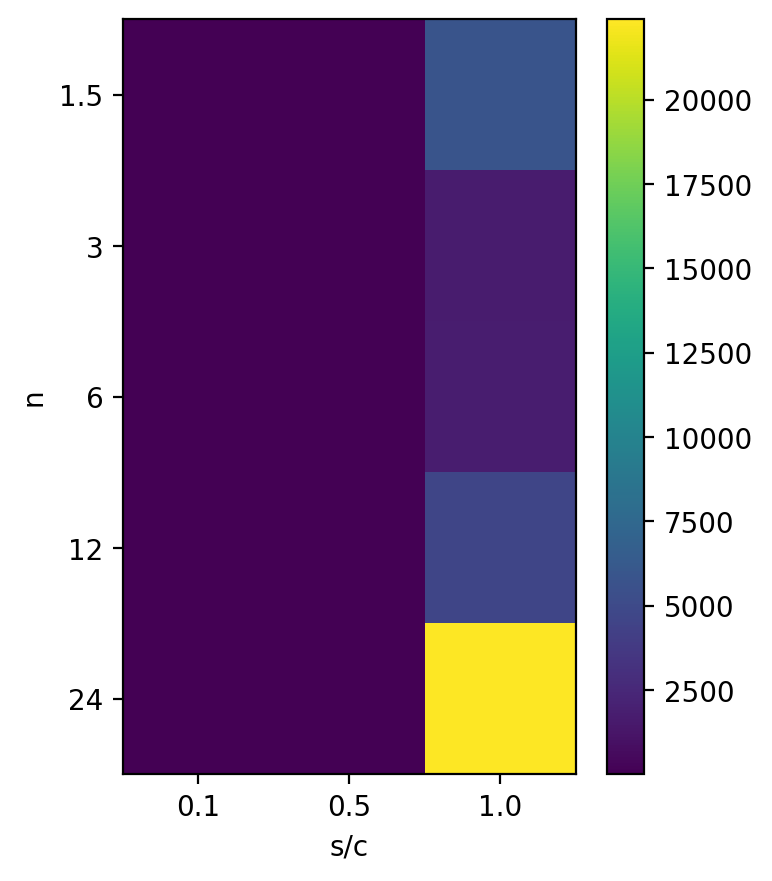

In [37]:
fig = plt.figure(figsize=(4,5),dpi=200)
plt.imshow(likratio)
plt.gca().set_yticks(list(range(len(nlist))))
plt.gca().set_yticklabels(true_nlist)
plt.gca().set_ylabel('n');
plt.gca().set_xticks([0,1,2])
plt.gca().set_xticklabels(sclist)
plt.gca().set_xlabel('s/c');
plt.colorbar()
fig.savefig('figures-friday/plotS1.png');